In [122]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

SECTION A:  5 MARKS 

Data Understanding (5 marks) --

In [123]:
df =pd.read_csv(r'Fish.csv')

In [124]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [125]:
df.shape

(159, 7)

There are 159 rows and 7 columns.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


species is the catagorical variable/feature, and Weight,Length1,Length2,Length3,Height,Width are continous numerical variable.

 b.Calculate five-point summary for numerical variables (1 MARK) 

In [127]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)

In [128]:
obs =df.Species.value_counts()
obs

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [129]:
obs*100/obs.sum()# percentage of each catagory 

Perch        35.220126
Bream        22.012579
Roach        12.578616
Pike         10.691824
Smelt         8.805031
Parkki        6.918239
Whitefish     3.773585
Name: Species, dtype: float64

d. Check for defects in the data such as missing values, null, outliers, etc. (2 marks) 

In [130]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

there are no null values in the data.

checking ouliers.

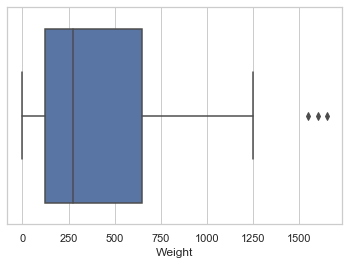

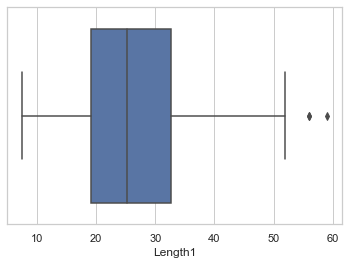

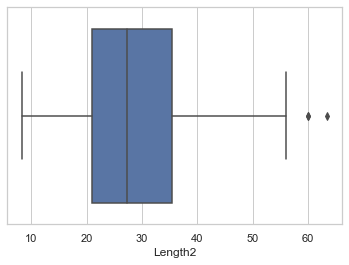

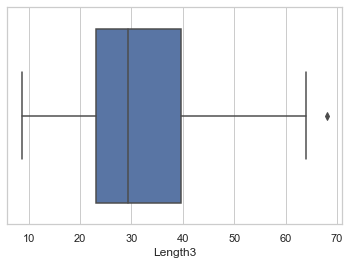

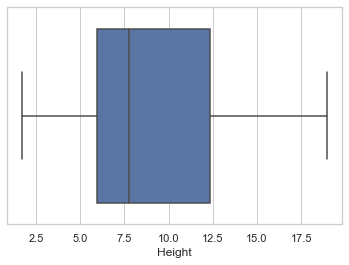

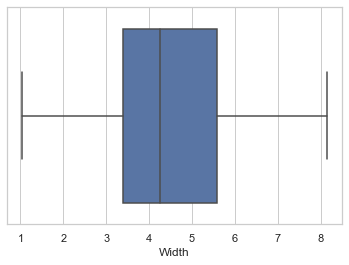

In [131]:
for i in df.select_dtypes(include=['float64']).columns:
    
    sns.boxplot(data =df,x = i)
    plt.show()

From the graph ,we can see their are veru few(2 to 3) outliers in weight , length1,length2,length3 features.

SECTION B:  10 MARKS 

Data Preparation (10 marks) 

a. Fix the defects found above and do appropriate treatment if any. (3 marks

Check for duplicated values

In [132]:
df[df.duplicated()]

,Species,Weight,Length1,Length2,Length3,Height,Width


there are no duplicate rows.

In [133]:
q1 =df.Weight.quantile(0.25)
q3 =df.Weight.quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr

In [134]:
df[df.Weight >ul]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [135]:
q1 =df.Length1.quantile(0.25)
q3 =df.Length1.quantile(0.75)
iqr1 = q3-q1
ul1 = q3 + 1.5*iqr1

In [136]:
df[df.Length1 >ul1]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [137]:
q1 =df.Length2.quantile(0.25)
q3 =df.Length2.quantile(0.75)
iqr1 = q3-q1
ul1 = q3 + 1.5*iqr1

In [138]:
df[df.Length2 >ul1]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [139]:
df1 = df[df.Length2 <ul1]

In [140]:
df1.shape

(156, 7)

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (3 marks)

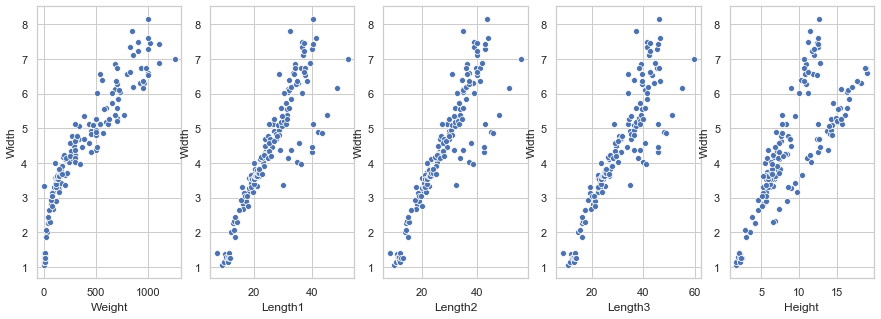

In [141]:
fig,axes =plt.subplots(1,5,figsize=(15,5))
sns.scatterplot(df1.Weight,df1.Width,ax = axes[0])
sns.scatterplot(df1.Length1,df1.Width,ax = axes[1])
sns.scatterplot(df1.Length2,df1.Width,ax = axes[2])
sns.scatterplot(df1.Length3,df1.Width,ax = axes[3])
sns.scatterplot(df1.Height,df1.Width,ax = axes[4])
plt.show()

we can see that width is highly correlated. when compared to others.

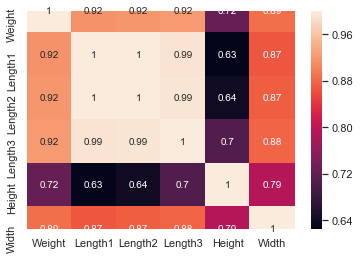

In [142]:
sns.heatmap(df.corr(),annot =True)

we can see  weight  and length3 are highly correlated.


c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks)

we can remove length1 and length2 as they are highly correlated within themselves. and we can keep only length3 if needed ,in place of the length1 and length2


In [143]:
df1.drop(columns = ['Length1','Length2'],inplace =True) # dont drop as of now, we can use lasso to do that.

C:\Users\SRK\Anaconda3\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
cols = [ i for i in df1.columns if df1[i].dtype=='O']
df1 =pd.get_dummies(df1,columns = cols,drop_first=True)
df1.shape


(156, 10)

In [145]:
y =df1['Width']
x = df1.drop(columns ='Width')

In [146]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


SECTION B:  10 MARKS 

a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (3 marks)

In [147]:
from sklearn.linear_model import LinearRegression

linear =LinearRegression()
model =linear.fit(X_train,y_train)

In [148]:
y_predicted = linear.predict(X_test)


In [149]:
print('r2 train:',model.score(X_train,y_train))

r2 train: 0.9719371841214168


In [150]:
print('r2 test:',model.score(X_test,y_test))

r2 test: 0.9541990319386607


the r2 square can be better than training data set.

In [151]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_predicted))
print('RMS:',rms)


RMS: 0.3300453302101831


RMS can be better using the feature selection and regularization

In [152]:
def mape(yact, y_pred): 

    return np.mean(np.abs((yact - y_pred) / yact)) * 100
print('mean absolute percentage error',mape(y_test,y_predicted))

mean absolute percentage error 5.056987010241991


we can imporove the mape value using the faeture selction techniques and avoiding multicollinearity if any.

b. Check for multi-collinearity and treat the same. (2 marks

NO MULTI COLLINEARITY: assumpution for linear regession is there should be no multi collinearity between the  independent varibales.

In [153]:
import statsmodels.api as sm 
X = sm.add_constant(x)

lm = sm.OLS(y, X).fit() 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Width   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     498.7
Date:                Wed, 05 Feb 2020   Prob (F-statistic):          6.82e-105
Time:                        15:46:39   Log-Likelihood:                -31.360
No. Observations:                 156   AIC:                             82.72
Df Residuals:                     146   BIC:                             113.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3863      0.370     -3.745      0.000      -2.118      -0.655
Weight                0.0007      0.000      2.263      0.025    9.21e-05       0.001
Length3               0.0858      0.014      6.017      0.000       0.058       0.114
Height                0.2024      0.044      4.569      0.000       0.115       0.290
Species_Parkki        0.7244      0.147      4.942      0.000       0.435       1.014
Species_Perch         1.7251      0.230      7.499      0.000       1.271       2.180
Species_Pike          0.4284      0.425      1.007      0.316      -0.412       1.269
Species_Roach         1.4356      0.222      6.470      0.000       0.997       1.874
Species_Smelt         1.1524      0.317      3.630      0.000       0.525       1.780
Species_Whitefish     1.4988      0.228      6.586      0.000       1.049       1.949
==============================================================================
Omnibus:                       31.200   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.452
Skew:                           0.930   Prob(JB):                     2.03e-13
Kurtosis:                       5.353   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,const,Weight,Length3,Height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
vif,228.570022,17.433779,38.563398,60.853001,2.349337,20.312419,24.667087,9.178066,13.732838,3.194597


here we can see that there is high multicollinearity in Length1,Length2,Length3 features.

How would you improve the model? Write clearly the changes that you will make before refitting the model. Fit the final model.  (6 marks) 

as in the base model, we can see that MSE is 35.5 with r2 bein 0.94  for test, 
so, when we try to apply the lasso , as we have the parameters, which are more collinear,
the coefficients of unimportant features will become zero.
and we used the grid search to tune the hyper parameters.
so, now the MSE is 23.7 with r2 for test is 0.95.

C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.861125291908479, tolerance: 0.026866178964408165
  tol, rng, random, positive)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.232629961895725, tolerance: 0.028053305559102043
  tol, rng, random, positive

MSE 0.23331771034363308
train r2 0.9719371841212097 test r2 0.9541989632622339
0.0


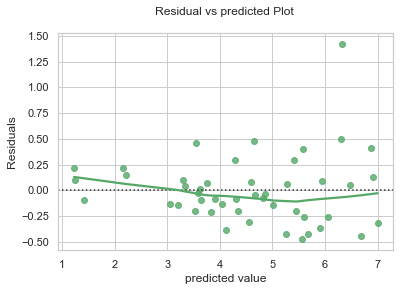

Wall time: 603 ms


(0.0,)

In [163]:
%%time
from sklearn.metrics import mean_absolute_error

model2=LassoCV(eps=0.0001,
    n_alphas=100, alphas=(0,0.5,0.01),fit_intercept=True,cv=10)
model2.fit(X_train,y_train)
test_predcv =model2.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_predcv))
print('train r2',model2.score(X_train,y_train) ,'test r2',model2.score(X_test,y_test))
print(model2.alpha_)
resid = y_test -test_predcv


#residual plot
sns.set(style = 'whitegrid')


ax = sns.residplot(test_predcv, resid, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'predicted value', ylabel = 'Residuals', title = 'Residual vs predicted Plot \n')
plt.show()
model2.alpha_,

In [156]:
model2.coef_

array([5.05179480e-04, 1.00891053e-01, 1.69087483e-01, 5.84531176e-01,
       1.46815751e+00, 2.03052136e-02, 1.21281863e+00, 9.18635081e-01,
       1.35439098e+00])

In [168]:
lambdas=np.linspace(0,0.1,100)
params={'alpha':lambdas}
model=Lasso(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=15,scoring='r2',n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
grid_search.cv_results_
test_pred=grid_search.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_pred))
print('train r2',grid_search.score(X_train,y_train) ,'test r2',grid_search.score(X_test,y_test))


Lasso(alpha=0.0030303030303030303, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MSE 0.24948095364609943
train r2 0.9700787594973905 test r2 0.9458664533783806


In [158]:
grid_search.best_estimator_

Lasso(alpha=0.00101010101010101, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [159]:

lasso = grid_search.best_estimator_
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
lasso.coef_,coeff_used,train_score,test_score


(array([ 7.60504470e-04,  1.06094525e-01,  1.16164610e-01,  4.33725358e-01,
         1.16096182e+00, -4.19216943e-01,  9.23776715e-01,  4.92528660e-01,
         1.08426509e+00]), 9, 0.9715732216444665, 0.9512058380469225)

d. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (2 marks) 

The Species_Perch, Species_Whitefish, Species_Roach,Species_Smelt,Species_Parkki,length3 has been given more weight in predicting the model.
i.e, the species name and its  cross sectional length, with its height added  more variance in predicting the width of the fish.
using lassocv we got a better result than others. 

In [162]:
X_train.head()

,Weight,Length3,Height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
60,1000.0,43.5,12.3540,0,0,0,0,0,1
2,340.0,31.1,12.3778,0,0,0,0,0,0
145,6.7,10.8,1.7388,0,0,0,0,1,0
43,150.0,24.7,5.8045,0,0,0,1,0,0
66,140.0,23.2,8.5376,1,0,0,0,0,0


In [160]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(model,k_features = 9,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2020-02-05 15:46:44] Features: 1/9 -- score: 0.8357299150157459[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2020-02-05 15:46:44] Features: 2/9 -- score: 0.8443246747677025[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2020-02-05 15:46:45] Features: 3/9 -- score: 0.8443246747677025[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

What changes from the base model had the most effect on model performance? (2 marks) 

removing the most multi collinear points length1& length2  has improved the MSE.and applying Lasso on that features boosted the r2 score also. 

In [ ]:
using Elastic net

In [187]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score


cv_model = ElasticNetCV(l1_ratio=[ .949, .95,0.951,0.97, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
cv_model.fit(X_train, y_train)


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.949, 0.95, 0.951, 0.97, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [188]:
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)
print(r2_score(y_train, model.predict(X_train))) # training data performance
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.9716921950255274
0.9519073194455757


In [189]:
model.coef_,model.alpha,model.l1_ratio

(array([ 7.30016987e-04,  1.04617891e-01,  1.25107765e-01,  4.65413809e-01,
         1.21391899e+00, -3.40510994e-01,  9.75887603e-01,  5.64247342e-01,
         1.14633335e+00]), 0.00016004722139154355, 0.95)